# hw-1
## Adam Filipowicz 4/11/20
For this first homework assignment in CS627: Data Science Programming I will be exploring some climate change and food scarcity data using python. This analysis was inspired by [this article](https://towardsdatascience.com/climate-change-and-food-scarcity-in-developing-regions-an-analysis-in-python-d8ca5ec5f496) by Dr. Sadrach Pierre. Global temperature data was pulled from [DataHub](https://datahub.io/collections/climate-change) and crop yield data was acquired from [Our World in Data](https://ourworldindata.org/crop-yields). Climate models are a complex system of differential equations incorporating basic laws of physics, fluid motion, and chemistry. ![Global Atmospheric Model](https://upload.wikimedia.org/wikipedia/commons/b/b1/Global_Climate_Model.png)

A very simple model of the radiative equilibrium of the Earth is: $$(1-a)S\pi r^2 = 4\pi r^2\epsilon\sigma T^4$$

However, in this notebook we'll just be doing some exploratory data analysis of publically available data, not messing with any models. We'll begin by importing Pandas in order to read our datasets:

In [1]:
import pandas as pd

Then, let's read in the annual global temperature dataset and print the first five rows:

In [2]:
df_global_temp = pd.read_csv("annual_temp.csv")
print(df_global_temp.head())

    Source  Year    Mean
0     GCAG  2016  0.9363
1  GISTEMP  2016  0.9900
2     GCAG  2015  0.8998
3  GISTEMP  2015  0.8700
4     GCAG  2014  0.7408


Let's just use the NASA GISTEMP data. We'll have to filter our data to do that:

In [3]:
df_global_temp = df_global_temp[df_global_temp['Source'] == 'GISTEMP'].reset_index()[["Source", "Year", "Mean"]]
print(df_global_temp.head())

    Source  Year  Mean
0  GISTEMP  2016  0.99
1  GISTEMP  2015  0.87
2  GISTEMP  2014  0.74
3  GISTEMP  2013  0.65
4  GISTEMP  2012  0.63


Looking good! What does the tail look like?

In [4]:
print(df_global_temp.tail())

      Source  Year  Mean
132  GISTEMP  1884 -0.28
133  GISTEMP  1883 -0.21
134  GISTEMP  1882 -0.10
135  GISTEMP  1881 -0.12
136  GISTEMP  1880 -0.20


So, looks like our data goes from 1880 to 2016. Alright, we'll now use matplotlib to make a line plot of temperature vs. time. We'll also add a horizontal line at the base period that the temperatures are compared to (0).

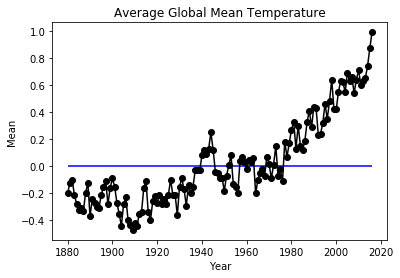

In [5]:
import matplotlib.pyplot as plt
plt.plot(df_global_temp['Year'], df_global_temp['Mean'], '-o', color='black')
plt.hlines(y=0, xmin=1880, xmax=2016, color='blue')
plt.xlabel("Year")
plt.ylabel("Mean")
plt.title("Average Global Mean Temperature")
plt.show()

The article linked above provides evidence that "if we don't tackle the issue of climate change quickly, ecosystems will continue to be disrupted...and crop yields (food production) will decrease. Along those lines, let's take a look at annual global production of rice. We'll begin by reading in the 'rice-yield.csv' dataset from Our World in Data:

In [6]:
df_rice = pd.read_csv("rice-yields.csv")
df_rice.head()

,Entity,Code,Year,(tonnes per hectare)
0,Afghanistan,AFG,1961,1.0831
1,Afghanistan,AFG,1962,1.0480
2,Afghanistan,AFG,1963,0.9548
3,Afghanistan,AFG,1964,1.0461
4,Afghanistan,AFG,1965,1.0621


We have an 'Entity' column for the countries, a 'Year' column and a '(tonnes per hectare)' column. What are all the countries represented in the data?

In [7]:
from collections import Counter
print(set(df_rice['Entity'].values))
print("NUMBER OF REGIONS: ", len(set(df_rice['Entity'].values)))

{'Bosnia and Herzegovina', 'Bhutan', 'Serbia', 'Swaziland', 'Gambia', 'Brunei', 'France', 'Pakistan', 'Yugoslavia', 'Asia, Central', 'Liberia', 'Burundi', 'Americas', 'Saudi Arabia', 'Guyana', 'Northern Africa', 'Philippines', 'South Africa', 'Chad', 'Gabon', 'Northern America', 'Serbia and Montenegro', 'Senegal', 'Luxembourg', 'Turkey', 'Europe', 'Vanuatu', 'Canada', 'Puerto Rico', 'Nicaragua', 'United Kingdom', 'Guinea-Bissau', 'Eritrea', 'Southern Europe', 'Kuwait', 'Namibia', 'Guam', 'Germany', 'Palestine', 'Belgium', 'Malawi', 'Argentina', 'Portugal', 'Armenia', 'Western Asia', 'Eastern Asia', 'Mongolia', 'United States', 'Iran', 'Micronesia (country)', 'Barbados', 'Georgia', 'Czechoslovakia', 'Europe, Western', 'Sao Tome and Principe', 'Myanmar', 'Egypt', 'Mauritius', 'Mexico', 'New Caledonia', 'Zambia', 'Thailand', 'Timor', 'Moldova', 'Bolivia', 'Ireland', 'Oceania', 'Central African Republic', 'Bangladesh', 'Middle Africa', 'Tunisia', 'United Arab Emirates', 'Trinidad and Tobag

That's a lot! Some are actually whole continents like 'Oceania' and 'South America'. What if we wanted to create a dropdown to select a specific region?

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [9]:
def list_of_regions(Region=set(df_rice['Entity'].values)):
    print(df_rice[df_rice['Entity']==Region].head())
    
rice_country_dropdown = interactive(list_of_regions)
rice_country_dropdown

interactive(children=(Dropdown(description='Region', options=('Bosnia and Herzegovina', 'Bhutan', 'Serbia', 'S…

Let's use that as a base to select a specific region and then plot annual rice production for that region:

In [10]:
def rice_production_plot(Region=set(df_rice['Entity'].values)):
    plt.plot(df_rice[df_rice['Entity']==Region]['Year'], df_rice[df_rice['Entity']==Region]['(tonnes per hectare)']);
    plt.xlabel("Year")
    plt.ylabel("Rice Production (tonnes per hectare)")
    plt.title("Annual Rice Production")
annual_rice_production = interactive(rice_production_plot)
annual_rice_production

interactive(children=(Dropdown(description='Region', options=('Bosnia and Herzegovina', 'Bhutan', 'Serbia', 'S…